

# K-means Clustering

Import resources and display image¶


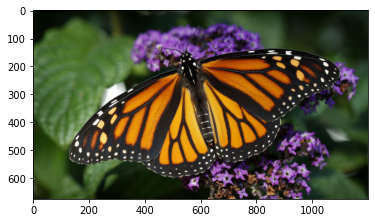

In [75]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import cv2

%matplotlib inline

url = "https://gdb.voanews.com/CBC211EE-FE73-4CFE-8F37-4E2B1ACE4C07_w1200_r1.jpg"
image = io.imread(url) 

image_copy = np.copy(image)

plt.imshow(image_copy)

Prepare data for k-means


In [0]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

Implement k-means clustering



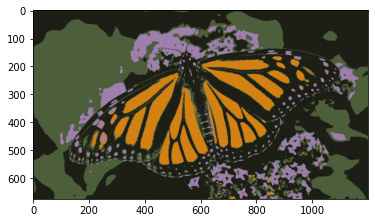

In [79]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 4       # For 4 colours
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

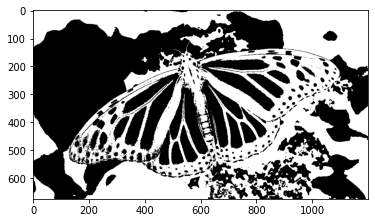

In [80]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==0, cmap='gray')

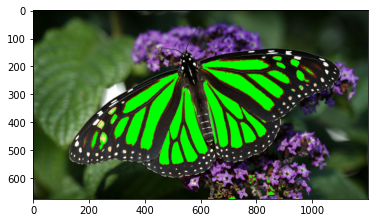

In [87]:
# mask an image segment by cluster

cluster = 2 # the third cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)